## Main Project - (Entertainment Domain)

                            Movie Recommendation System

###### Importing relevant libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

##### Reading the dataset into Python Environment :

In [2]:
# Using movies metadataset 

dataset = pd.read_csv("DSA_B1group5.csv")

dataset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### Checking the basic details of the dataset :

In [3]:
### Displaying information about the dataframe including the index,dtype and columns, non-null values and memory usages.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
## Generating a sample random of row or column.

dataset.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1004,False,"{'id': 100970, 'name': 'The Fox and the Hound ...",12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://movies.disney.com/the-fox-and-the-hound,10948,tt0082406,en,The Fox and the Hound,When a feisty little fox named Tod is adopted ...,...,1981-07-10,29800000.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A story of two friends who didn't know they we...,The Fox and the Hound,False,7.0,884.0
10188,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,78344,tt0380485,en,Ha-Kochavim Shel Shlomi,16 years old Shlomi lives with his restless mo...,...,2003-04-03,0.0,94.0,"[{'iso_639_1': 'he', 'name': 'עִבְרִית'}]",Released,NaN,Bonjour Monsieur Shlomi,False,7.0,4.0
42613,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,380061,tt5275780,en,Cameron Esposito: Marriage Material,Cameron Esposito decided to do something a bit...,...,2016-03-24,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Cameron Esposito: Marriage Material,False,7.0,1.0
21072,False,NaN,2640000,"[{'id': 10749, 'name': 'Romance'}]",NaN,85047,tt2064849,en,"London, Paris, New York",London Paris New York is a film that captures ...,...,2012-03-02,0.0,100.0,[],Released,NaN,"London, Paris, New York",False,8.0,1.0
30731,False,"{'id': 115822, 'name': 'Dracula 2000 Collectio...",0,"[{'id': 27, 'name': 'Horror'}]",NaN,10578,tt0336325,en,Dracula II: Ascension,Sequel to Dracula 2000. Father Uffizi [Jason S...,...,2003-06-07,0.0,85.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,Dracula II: Ascension,False,5.1,30.0
45336,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,269981,tt0122737,en,Twelve Angry Men,Twelve Angry Men is a 1954 teleplay by Reginal...,...,1954-09-20,0.0,51.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Twelve Angry Men,False,8.5,4.0
30322,False,"{'id': 341455, 'name': 'Tanu Weds Manu Collect...",400000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://www.tanuwedsmanu.com,58333,tt1694542,hi,Tanu Weds Manu,Marriages are made in heaven! Though the road ...,...,2011-03-25,252000.0,119.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Celebrate a perfect mismatch.,Tanu Weds Manu,False,6.1,20.0
8839,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",NaN,9041,tt0086655,fr,L'Été meurtrier,"In spring 1976, a 19-year-old beauty, her Germ...",...,1983-05-11,0.0,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,One Deadly Summer,False,7.1,28.0
22371,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,224950,tt2374196,en,Solo,A teenage girl is terrorized when she spends t...,...,2013-08-29,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Solo,False,4.7,10.0
22422,False,"{'id': 209739, 'name': 'MacGyver (TV Movies) C...",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,13632,tt0110420,en,MacGyver: Trail to Doomsday,A close friend of MacGyver is murdered. In sea...,...,1994-11-24,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,MacGyver: Trail to Doomsday,False,5.5,15.0


In [5]:
## dtypes returns the data types of the columns.

dataset.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [6]:
# Shape of the dataset, i.e displaying number of rows and columns

print("Shape of the dataset is ",dataset.shape)

print('The total number of movies are',dataset.shape[0])

Shape of the dataset is  (45466, 24)
The total number of movies are 45466


In [7]:
# To find the size of the dataset

dataset.size

1091184

In [8]:
# To display the columns

dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
## nunique() returns the series with number of distinct observations over requested axis.

dataset.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

### EDA

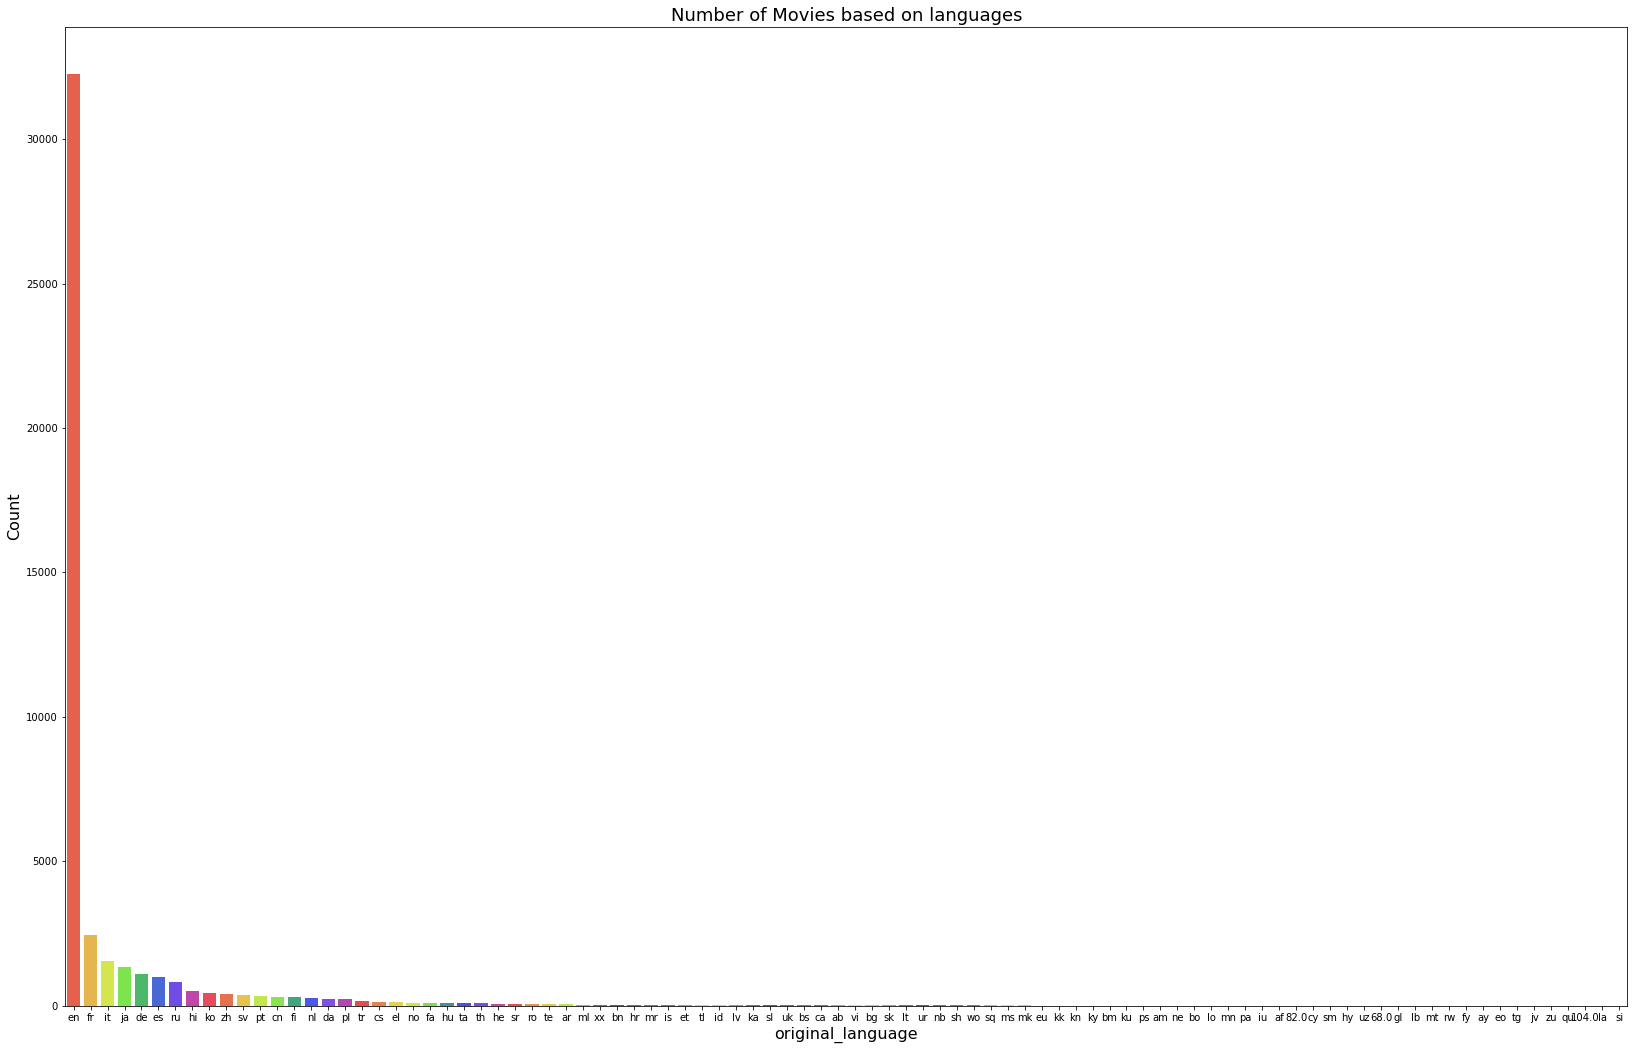

In [10]:
count = dataset['original_language'].value_counts()
plt.figure(figsize=(28,18))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=16)
plt.xlabel('original_language', fontsize=16)
plt.title('Number of Movies based on languages', fontsize = 18)
plt.show()

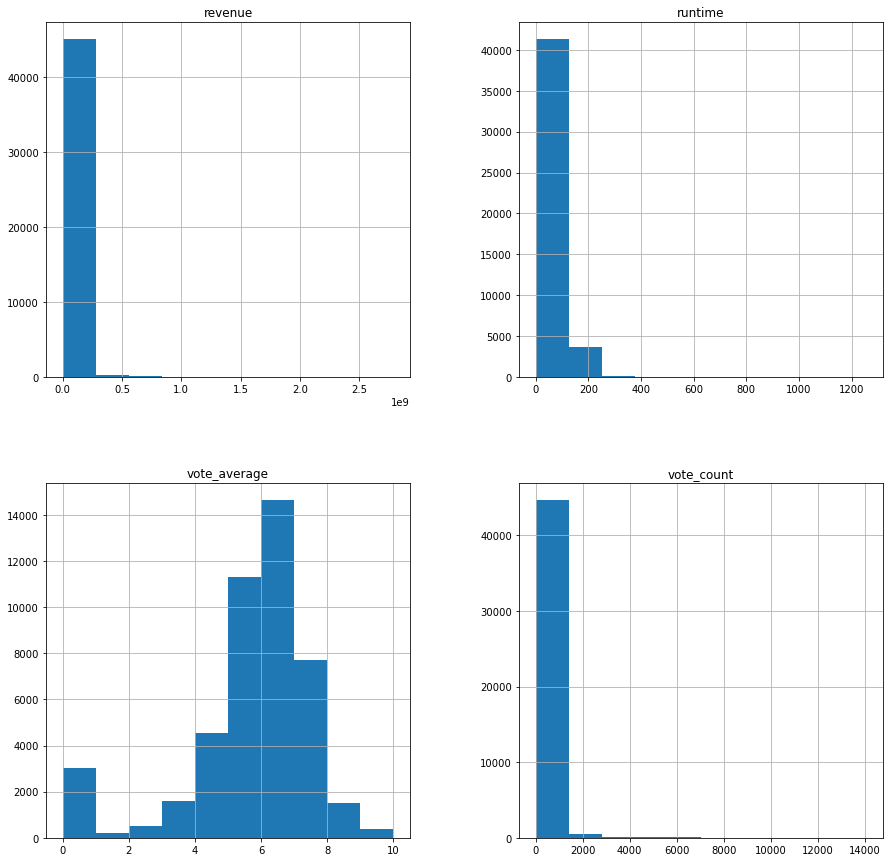

In [11]:
freqgraph=dataset.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,15))
plt.show()

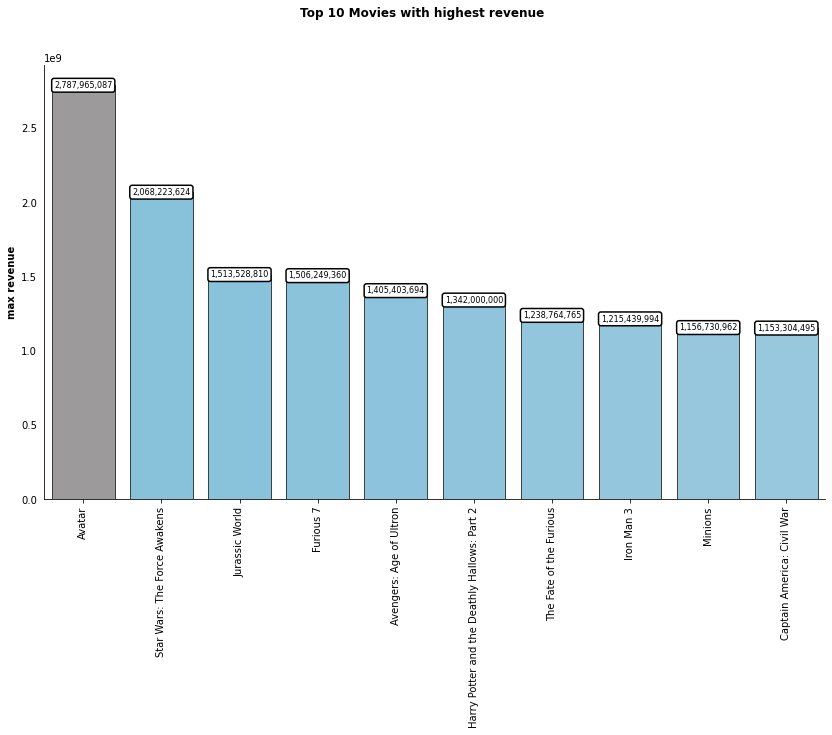

In [12]:
fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = dataset.groupby('original_title')['revenue'].mean().sort_values(ascending=False).head(10)
color = ['skyblue' for i in range(15)]
color[0] = 'red'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=10, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='max revenue', fontsize=10, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+38
    ax.text(x=x, y=y, s=value, fontsize=8, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=1.5))
    
fig.suptitle(t='Top 10 Movies with highest revenue', fontsize=12, weight='bold')
sns.despine()
plt.show()

In [13]:
dataset['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [14]:
dataset['genres'] = dataset['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dataset['genres'] = dataset['genres'].str.split(',')

In [15]:
dataset.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

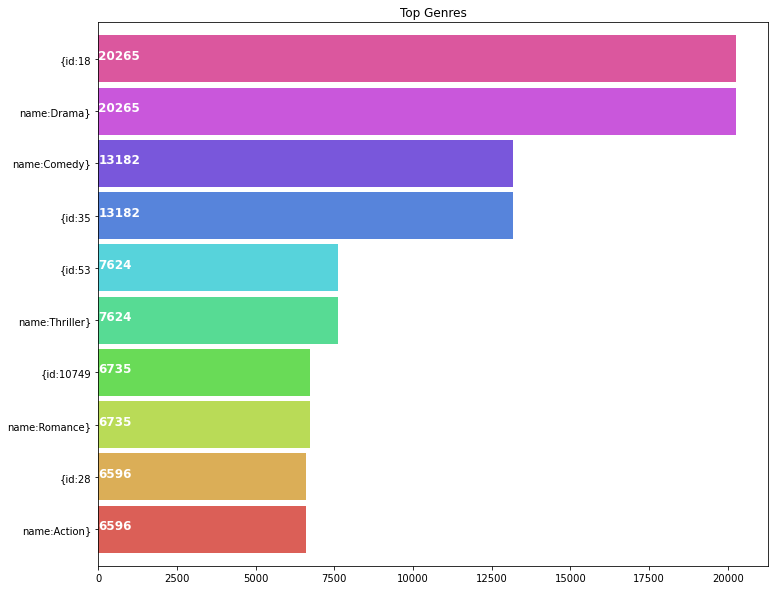

In [16]:
plt.subplots(figsize=(12,10))
list1 = []
for i in dataset['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [ ]:
dataset = dataset.groupby("revenue")['runtime'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,7])
sns.barplot(data = dataset, x=  'revenue', y = 'runtime',palette = 'GnBu_r')
plt.ylabel('Percent of baseline')

In [18]:
dataset.dtypes

revenue    float64
runtime    float64
dtype: object

Plotting the top liked movies in genre

In [20]:
dataset['genres'] = dataset['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
dataset['genres'] = dataset['genres'].str.split(',')

KeyError: 'genres'

In [21]:
dataset['genres'] = dataset['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
dataset['genres'] = dataset['genres'].str.split(',')

KeyError: 'genres'

<AxesSubplot:>

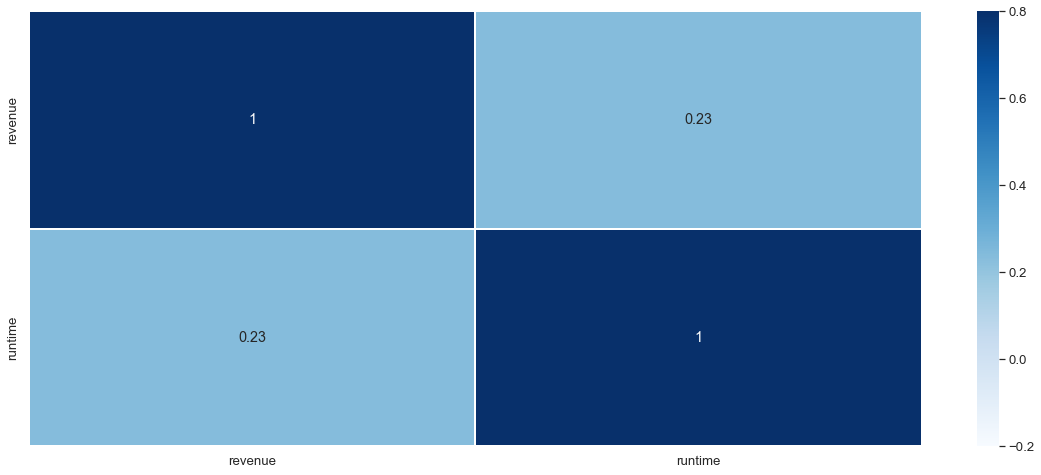

In [22]:
corrmatrix=dataset.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=0.8,linewidth=0.2,cmap='Blues')

The movies with highest revenue has the highest correlation with vote_count, so we can assume that movies with highest revenues have the highest votecounts. 


In [24]:
from scipy import stats
from ast import literal_eval

In [25]:
# Creating the year column with datetime object for each movie

dataset['year'] = pd.to_datetime(dataset['release_date'], errors='coerce').apply(lambda x: x.year)

KeyError: 'release_date'